In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

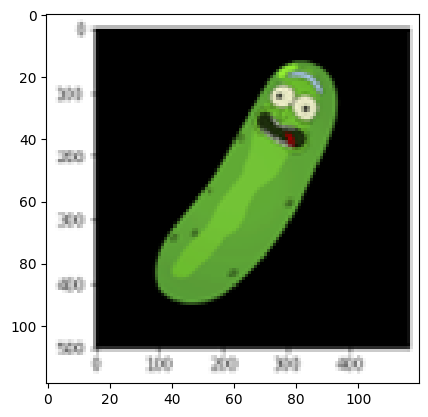

In [10]:
# Ophalen image 'PickleRick' 
loc_input_img = os.path.join('image_raw.png')
image = Image.open(loc_input_img)
np_image = np.array(image)

# Plotten image 'PickleRick'
plt.imshow(np_image)
plt.show()

In [11]:
# Onderzoek image 'PickleRick'
np_image.shape

# (119, 120, 4)
# 119 samples van 120 pixels telkens met 4 waarden (RGBA)
# - R - RED [0..255]
# - G - GREEN [0..255]
# - B - BLUE [0..255]
# - A - ALPHA(OPACITY) [0..255]


(119, 120, 4)

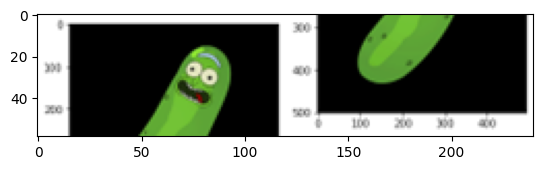

In [12]:
# Ondezoek image 'PickleRick'
np_image_test_0_59 = np_image[:59]
np_image_test_60_119 = np_image[60:]
np_image_test = np.hstack((np_image_test_0_59, np_image_test_60_119))
plt.imshow(np_image_test)
plt.show()

# Image 'PickleRick' bevat nog kader met assenstelsel
# 1ste sample is bovenkant figuur 'PickleRick'


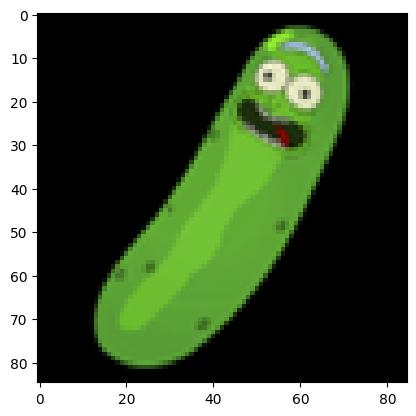

In [13]:
# Image 'PickleRick' resize-n om manipulatie te kunnen aanvatten
# Boven-/onderkant wegtrimmen door eerste/laatste samples te laten vallen [12:97]
# np_image_resize = np_image[12:97]
# Smaller maken door pixels aan begin en einde van iedere sample te laten vallen [:, 22:107]
# np_image_resize = np_image[:, 22:107]
# Deze beide combineren zodanig dat er vierkante 'matrix' overblijft van 85samples met telkens 85pixels
np_image_resize = np_image[12:97, 22:107]

plt.imshow(np_image_resize)
plt.show()


In [14]:
# Herwerkte figuur kopiëren om manipulaties te kunnen aanvatten
np_image_copy = np_image_resize.copy()

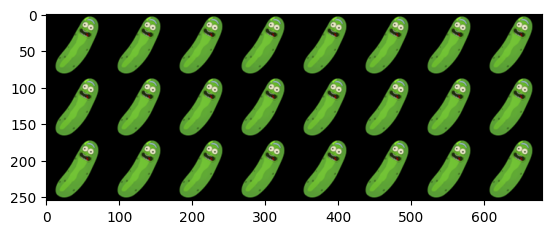

In [15]:
# Manipulatie(1) - Image reproduceren in 3 rijen van telkens 8 figuren
aantal_rijen = 3
aantal_kolommen = 8

np_image_manip_1 = np.hstack((np.vstack((np_image_copy,)*aantal_rijen),)*aantal_kolommen)
plt.imshow(np_image_manip_1)
plt.show()


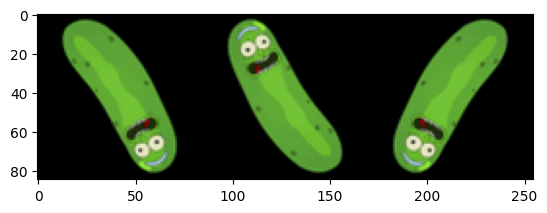

In [16]:
# Manipulatie(2) - Spiegelen 
# np_image_copy = np_image_resize.copy()
np_image_mirror_samples = np_image_copy[::-1, ::]
np_image_mirror_pixels = np_image_copy[::, ::-1]
np_image_mirror_samples_pixels = np_image_copy[::-1, ::-1]

np_image_manip_2_example = np.hstack((np_image_mirror_samples, np_image_mirror_pixels, np_image_mirror_samples_pixels))
plt.imshow(np_image_manip_2_example)
plt.show()


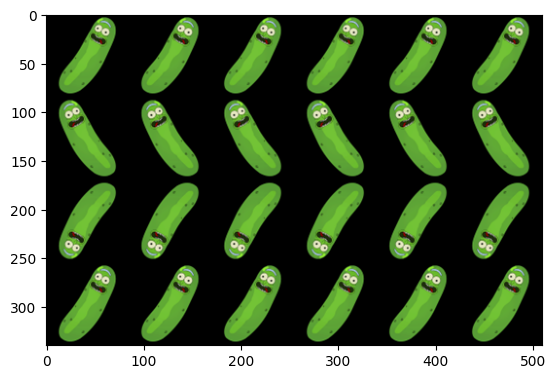

In [17]:
# Manipulatie(2.1) - Image reproduceren in 4 rijen van telkens 6 figuren
# 0 - 85 - 170 - 255 - 340 - 425 - 510 - 595
aantal_rijen = 4
aantal_kolommen = 6
np_image_manip_2_1 = np.hstack((np.vstack((np_image_copy,)*aantal_rijen),)*aantal_kolommen)
# Manipulatie(2.2) - Enkele figuren vervangen door gespiegelde versie
np_image_manip_2_2 = np_image_manip_2_1.copy()
for i in range(0,6):
    start = i*85
    stop = (i+1)*85
    np_image_manip_2_2[85:170, start:stop] = np_image_mirror_pixels
    np_image_manip_2_2[170:255, start:stop] = np_image_mirror_samples
    np_image_manip_2_2[170:255, start:stop] = np_image_mirror_samples_pixels


plt.imshow(np_image_manip_2_2)
plt.show()


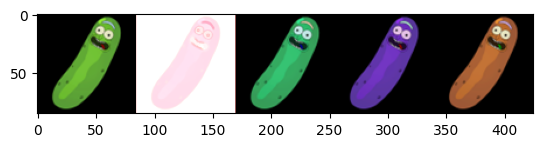

In [18]:
# Manipulatie(3) - Verkleuren 
# np_image_copy = np_image_resize.copy()
np_image_RGBA = np_image_copy[:, :, [0, 1, 2, 3]]
np_image_ARGB = np_image_copy[:, :, [3, 0, 1, 2]]
np_image_BGRA = np_image_copy[:, :, [2, 1, 0, 3]]
np_image_RBGA = np_image_copy[:, :, [0, 2, 1, 3]]
np_image_GRBA = np_image_copy[:, :, [1, 0, 2, 3]]

np_image_manip_3_example = np.hstack((np_image_RGBA, np_image_ARGB, np_image_BGRA, np_image_RBGA, np_image_GRBA))
plt.imshow(np_image_manip_3_example)
plt.show()


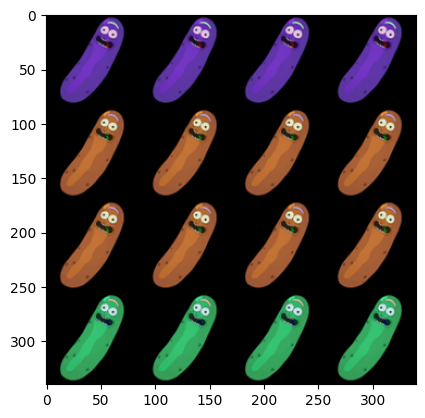

In [19]:
# Manipulatie(3.1) - Image reproduceren in 4 rijen van telkens 4 figuren
# 0 - 85 - 170 - 255 - 340 - 425 - 510 - 595
aantal_rijen = 4
aantal_kolommen = 4
np_image_manip_3_1 = np.hstack((np.vstack((np_image_copy,)*aantal_rijen),)*aantal_kolommen)
# Manipulatie(3.2) - Enkele figuren vervangen door gekleurde versie
np_image_manip_3_2 = np_image_manip_3_1.copy()
for i in range(0,aantal_kolommen):
    start = i*85
    stop = (i+1)*85
    np_image_manip_3_2[0:85, start:stop] = np_image_RBGA
    np_image_manip_3_2[85:170, start:stop] = np_image_GRBA
    np_image_manip_3_2[170:255, start:stop] = np_image_GRBA
    np_image_manip_3_2[255:340, start:stop] = np_image_BGRA
    
plt.imshow(np_image_manip_3_2)
plt.show()
